<a href="https://colab.research.google.com/github/brunobro/regressao-linear-e-transformacao-logartimica/blob/main/MI_RegressaoLinear_Transforma%C3%A7%C3%A3oLogaritimica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão Linear e Transformação Logarítmica**

Nesta tutorial veremos como utilizar Transformação Logarítmica para melhorar a obtenção de um modelo de regressão.


**O que é Regressão?**

No contexto de aprendizado de máquina (machine learning) as técnicas de regressão visam encontrar modelos (funções) $y=f(x)$ que associam a variável de entrada $x$ a variável de resposta $y$, utilizando dados coletados dessa associação.

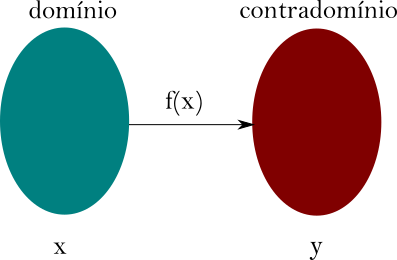

**Iniciamos com um exemplo analisando a função horária da veolicidade**

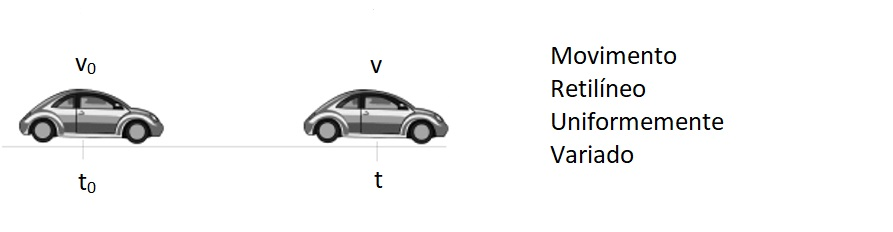


No exemplo acima a função horária da velocidade é dada por

$$ v(t) = v_0 + at $$

onde a aceleração $a$ e a velocidade do móvel $v_0$ no tempo $t_0$ são constantes.

Vamos agora considerar um experimento onde realizamos medições de um certo móvel para descobrir sua função horária. 

As medições estão discriminadas a seguir para cada tempo $t$, que varia de 1 a 9 segundos.

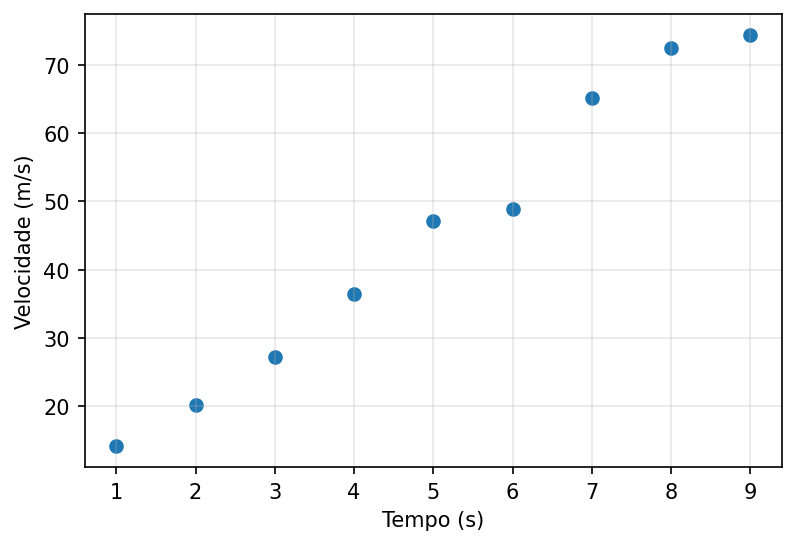

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Dados gerados considerando uma função horária v(t) = 4 + 8*t + erro
tempos      = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
velocidades = np.array([14.1, 20.2, 27.2, 36.4, 47.1, 48.9, 65.2, 72.5, 74.4])

plt.figure(dpi=150)
plt.scatter(tempos, velocidades)
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.grid(alpha=0.3)
plt.show()

**Regressão Linear**

Visa ajustar uma reta 

$$ y = f(x) = \beta_0 + \beta_1 x$$

aos pontos do conjunto

$$T = \{ (x_1, y_1), \cdots, (x_N, y_N)\}$$

de tal modo que a distância entre essa reta e cada um dos pontos seja a menor possível.

Os **coeficientes** $\beta_0$ e $\beta_1$ são estimados considerando o erro quadrático médio 

$$EQM(\hat{y}_i) = \frac{1}{N}\sum{(\hat{y}_i - y_i)^2}$$

onde $\hat{y}_i$ é uma aproximação de $y_i$, que á fornecida pela função $f(x)$.

A minimização do $EQM(\hat{y}_i)$, através dos cálculos das derivadas parciais resulta nos seguintes valores para os coeficientes da reta $y = f(x)$:

$$\beta_1 = \dfrac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sum{(x_i - \bar{x})^2}}$$

$$\beta_0 = \bar{y} - \beta_1 \bar{x}$$

onde $\bar{y} = \frac{1}{N} \sum{y}$.

Relembrando os conceitos do ensino médio, sobre equação reduzida da reta entendemos que $\beta_0$ é o valor de $y$ quando $x=0$, isto é, $(0, \beta_0)$ é o ponto que a reta $y=f(x)$ intercepta o eixo-$y$, enquanto que $\beta_1 = \dfrac{y_i - y_j}{x_i - x_j} = \dfrac{\Delta y}{\Delta x}$ representa a variação em $y$ quando $x$ aumenta de uma unidade.


Velocidade no instante 0: 4.56
Aceleração: 8.11
MAE: 2.30
R²: 0.98


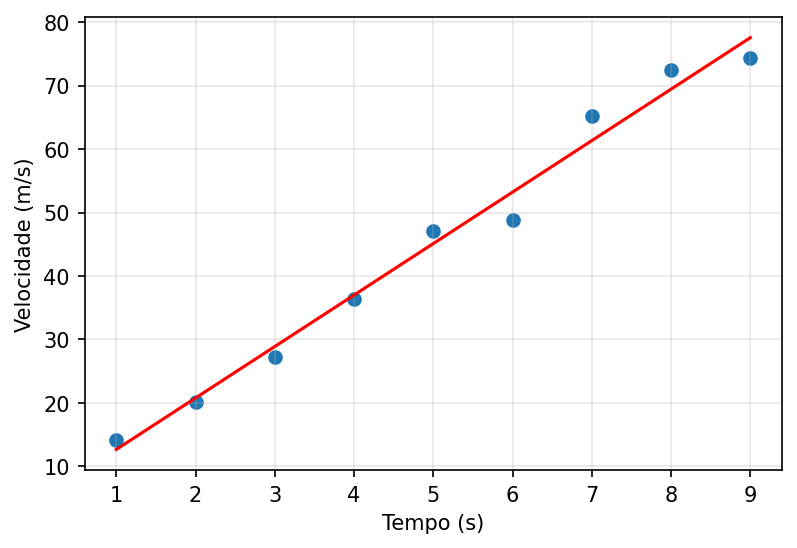

In [2]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

#Estimação da função horária da velocidade
#Estima os coeficientes e a função horária da velocidade
reg = LinearRegression().fit(tempos.reshape(-1, 1), velocidades)
v0, a = reg.intercept_, reg.coef_[0] #coeficientes
v     = v0 + a * tempos    #função horária

print('Velocidade no instante 0: %.2f' %v0)
print('Aceleração: %.2f' %a)
print('MAE: %.2f' %mean_absolute_error(v, velocidades))
print('R²: %.2f' %r2_score(v, velocidades))

#Mostra o resultado
plt.figure(dpi=150)
plt.scatter(tempos, velocidades)
plt.plot(tempos, v, color='r')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.grid(alpha=0.3)
plt.show()

**Uma dificuldade para a Regressão Linear**

Consideramos agora um problema onde a aplicação da Regressão Linear, diretamente, não fornece resultados tão bons.

Consideramos um conjunto de dados criado por C. Bruce and F. X. Schumacher in 1935, denominado Short Leaf data com os dados de 70 pinheiros de folhas curtas, onde a variável $x$ é o diâmetro da árvore e a variável $y$ seu volume. 

O objetivo então é obter um modelo de regressão que estime o volume dado o diâmetro da árvore.

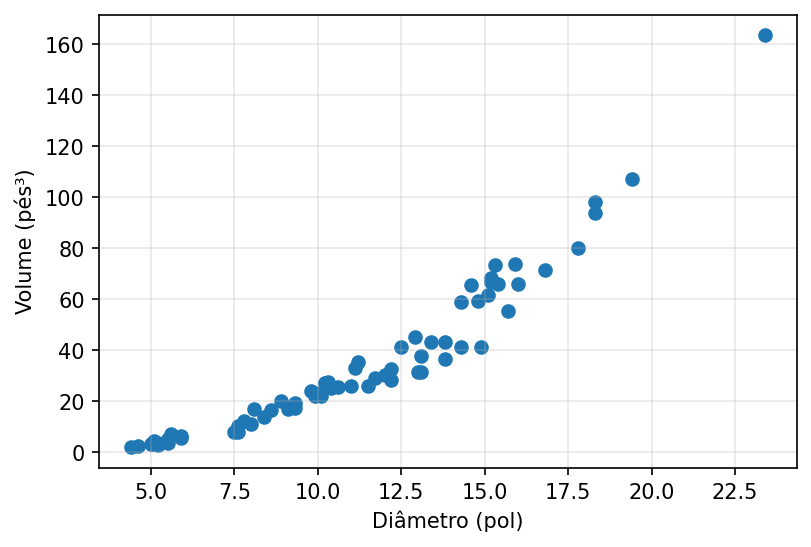

In [3]:
#Dados dos 70 pinheiros
diametro = np.array([4.4, 4.6, 5.0, 5.1, 5.1, 5.2, 5.2, 5.5, 5.5, 5.6, 5.9, 5.9, 7.5, 7.6, 7.6, 
                     7.8, 8.0, 8.1, 8.4, 8.6, 8.9, 9.1, 9.2, 9.3, 9.3, 9.8, 9.9, 9.9, 9.9, 10.1, 
                     10.2, 10.2, 10.3, 10.4, 10.6, 11.0, 11.1, 11.2, 11.5, 11.7, 12.0, 12.2, 12.2, 
                     12.5, 12.9, 13.0, 13.1, 13.1, 13.4, 13.8, 13.8, 14.3, 14.3, 14.6, 14.8, 14.9, 
                     15.1, 15.2, 15.2, 15.3, 15.4, 15.7, 15.9, 16.0, 16.8, 17.8, 18.3, 18.3, 19.4, 23.4])

volume   = np.array([2.0, 2.2, 3.0, 4.3, 3.0, 2.9, 3.5, 3.4, 5.0, 7.2, 6.4, 5.6, 7.7, 10.3, 8.0, 12.1, 11.1, 
                     16.8, 13.6, 16.6, 20.2, 17.0, 17.7, 19.4, 17.1, 23.9, 22.0, 23.1, 22.6, 22.0, 27.0, 27.0, 
                     27.4, 25.2, 25.5, 25.8, 32.8, 35.4, 26.0, 29.0, 30.2, 28.2, 32.4, 41.3, 45.2, 31.5, 37.8, 
                     31.6, 43.1, 36.5, 43.3, 41.3, 58.9, 65.6, 59.3, 41.4, 61.5, 66.7, 68.2, 73.2, 65.9, 55.5, 
                     73.6, 65.9, 71.4, 80.2, 93.8, 97.9, 107.0, 163.5])

#Mostra a dispersão dos dados
plt.figure(dpi=150)
plt.scatter(diametro, volume)
plt.xlabel('Diâmetro (pol)')
plt.ylabel('Volume (pés³)')
plt.grid(alpha=0.3)
plt.show()

Coeficientes estimados
Beta 0: -41.5681
Beta 1: 6.8367
MAE: 7.03
R²: 0.89


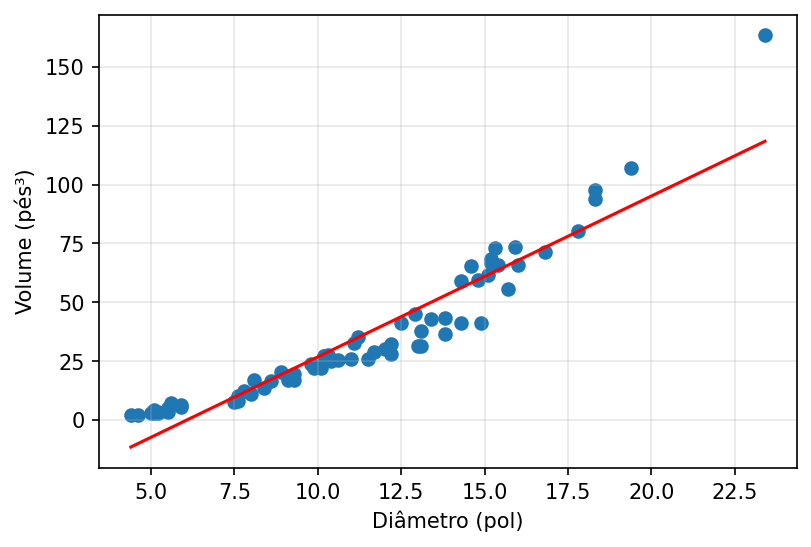

In [4]:
#Tenta ajustar uma reta de regressão para estimar o volume da árvore
reg = LinearRegression().fit(diametro.reshape(-1, 1), volume)
beta0, beta1 = reg.intercept_, reg.coef_[0] #coeficientes
volume_estimado = beta0 + beta1 * diametro

print('Coeficientes estimados')
print('Beta 0: %.4f' %beta0)
print('Beta 1: %.4f' %beta1)
print('MAE: %.2f' %mean_absolute_error(volume, volume_estimado))
print('R²: %.2f' %r2_score(volume, volume_estimado))

#Mostra o resultado
plt.figure(dpi=150)
plt.scatter(diametro, volume)
plt.plot(diametro, volume_estimado, color='r')
plt.xlabel('Diâmetro (pol)')
plt.ylabel('Volume (pés³)')
plt.grid(alpha=0.3)
plt.show()

**Transformação Logarítmica para Regressão Linear**

Vamos entender como a Transformação Logarítmica modifica os dados do problema anterior a fim de que seja possível estimar, de modo mais preciso, uma reta de regressão. (Obs: Esta abordagem é valida apenas se as variáveis são estritamente positivas.)

Para isso consideramos o modelo de regressão na escala logarítimica

$$y = e^{\beta_0} \times x^{\beta_1} $$

Aplicamos a função logaritimo na base de Euler na equação acima e utilizamos as propriedades das funções logarítmicas

$$\ln{(y)} = \ln{(e^{\beta_0} \times x^{\beta_1})} $$

$$ \ln{(y)} = \beta_0 + \beta_1\ln{(x)}$$

Assim, temos o mesmo modelo de Regressão Linear, mas às variáveis $y$ e $x$ são aplicadas as funções logaritmos.

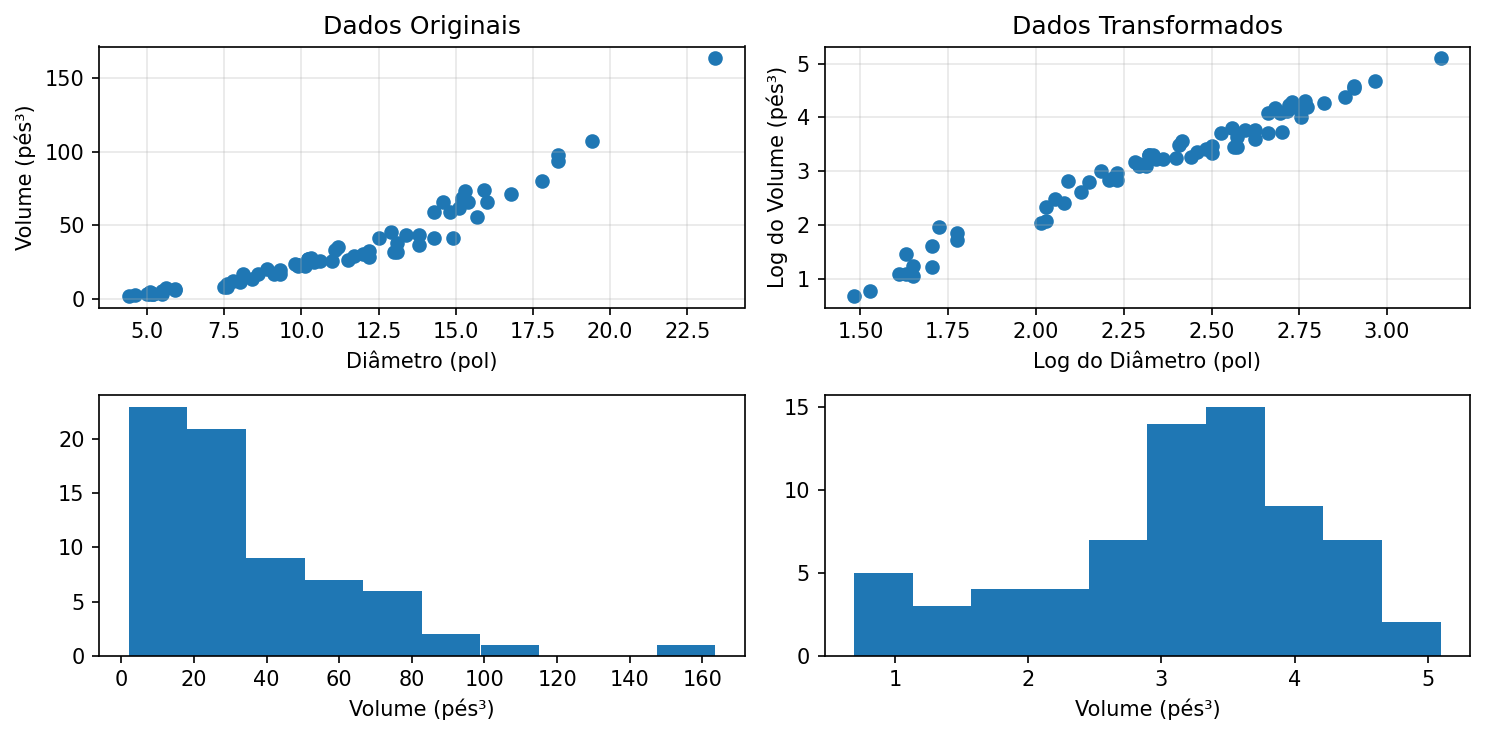

In [5]:
#Aplicamos a solução acima para resolver o problema proposto

#Aplica a função logartmio na base de Euler as variáveis
diametro_log = np.log(diametro)
volume_log   = np.log(volume)

#Mostra os valores na escala original e logartmica
plt.figure(dpi=150, figsize=(10,5))
plt.subplot(221)
plt.title('Dados Originais')
plt.scatter(diametro, volume)
plt.xlabel('Diâmetro (pol)')
plt.ylabel('Volume (pés³)')
plt.grid(alpha=0.3)
plt.subplot(223)
plt.hist(volume, bins=10)
plt.xlabel('Volume (pés³)')
plt.subplot(222)
plt.title('Dados Transformados')
plt.scatter(diametro_log , volume_log)
plt.xlabel('Log do Diâmetro (pol)')
plt.ylabel('Log do Volume (pés³)')
plt.grid(alpha=0.3)
plt.subplot(224)
plt.hist(volume_log, bins=10)
plt.xlabel('Volume (pés³)')
plt.tight_layout()
plt.show()

Estimação dados originais
Beta 0: -41.5681
Beta 1: 6.8367
MAE: 7.03
R²: 0.89

Estimação dados transformados
Beta 0: -2.8718
Beta 1: 2.5644
MAE: 4.11
R²: 0.96


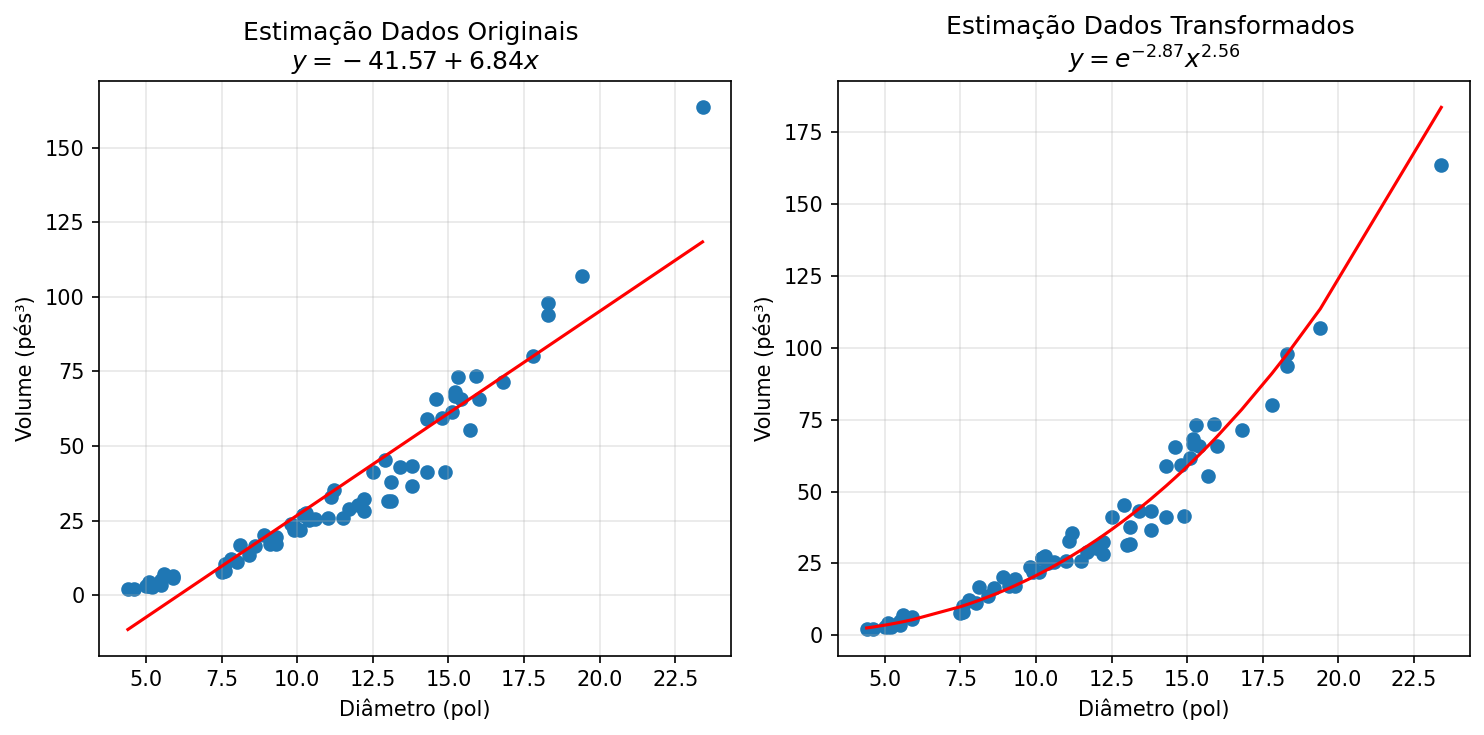

In [6]:
#Calcula os coeficientes beta nos dados transformados
reg_log = LinearRegression().fit(diametro_log.reshape(-1, 1), volume_log)
betal0, betal1 = reg_log.intercept_, reg_log.coef_[0] #coeficientes

#Estima os volumes (y) utilizando o modelo na escala logarítmica
#Observe que aplicamos os valores originais do diâmetro (x) utilizando os coeficientes estimados no espaço transformado
volume_estimado_log = np.exp(betal0) * diametro**betal1

print('Estimação dados originais')
print('Beta 0: %.4f' %beta0)
print('Beta 1: %.4f' %beta1)
print('MAE: %.2f' %mean_absolute_error(volume, volume_estimado))
print('R²: %.2f' %r2_score(volume, volume_estimado))
print('')
print('Estimação dados transformados')
print('Beta 0: %.4f' %betal0)
print('Beta 1: %.4f' %betal1)
print('MAE: %.2f' %mean_absolute_error(volume, volume_estimado_log))
print('R²: %.2f' %r2_score(volume, volume_estimado_log))

#Formata os modelos estimados
modelo_linear = '$y = ' + str(np.round(beta0, 2)) + ' + ' + str(np.round(beta1, 2)) + 'x$'
modelo_loglog = '$y = e^{' + str(np.round(betal0, 2)) + '} x^{' + str(np.round(betal1, 2)) + '}$'

#Mostra o resultado
plt.figure(dpi=150, figsize=(10,5))
plt.subplot(121)
plt.title('Estimação Dados Originais \n' + modelo_linear)
plt.scatter(diametro, volume)
plt.plot(diametro, volume_estimado, color='r')
plt.xlabel('Diâmetro (pol)')
plt.ylabel('Volume (pés³)')
plt.grid(alpha=0.3)
plt.subplot(122)
plt.title('Estimação Dados Transformados \n' + modelo_loglog)
plt.scatter(diametro, volume)
plt.plot(diametro, volume_estimado_log, color='r')
plt.xlabel('Diâmetro (pol)')
plt.ylabel('Volume (pés³)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Quando devo aplicar uma Transformação Logaritimica?**

Uma técnica prática é calcular o histograma de distribuição da variável de resposta (y) e verificar as caudas dessa distribuição. Caudas longas (distribuição assimétrica) indicam que a aplicação da Transformação Logaritimica pode ser útil.

Pode-se também calcular o coeficiente de assimetria (Portal Action):

$$ CA = \dfrac{1}{N}\sum{\left( \dfrac{y_i - \bar{y}}{\sigma} \right)^3}$$

onde $\sigma$ é o desvio padrão da amostra.

Utilizando o coeficiente $CA$ temos que:

*   Se $CA < 0$ cauda esquerda é maior
*   Se $CA > 0$ cauda direita é maior
*   Se $CA = 0$ caudas relativamente iguais



Coeficiente de Assimetria: 1.60


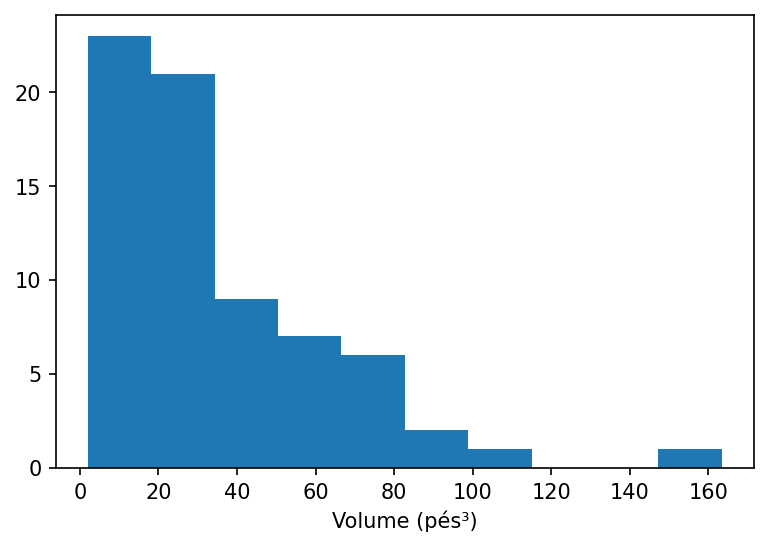

In [7]:
def CA(y):
  '''
  Coeficiente de Assimetria
  '''
  return (1/len(y)) * np.sum(((y - np.mean(y)) / np.std(y))**3)

print('Coeficiente de Assimetria: %.2f' % CA(volume))

#Mostra a distribuição do volume
plt.figure(dpi=150)
plt.hist(volume, bins=10)
plt.xlabel('Volume (pés³)')
plt.show()


**Outro exemplo de regressão**

Neste exemplo utilizamos uma base de dados sobre medida de peixes de 7 espécies. Esta base está disponível no Kaggle.

Utilizaremos apenas duas variáveis dentre as disponível: peso e largura.

O objetivo é prever o peso (y) dada a largura do peixe (x).

Coeficiente de Assimetria: 1.09


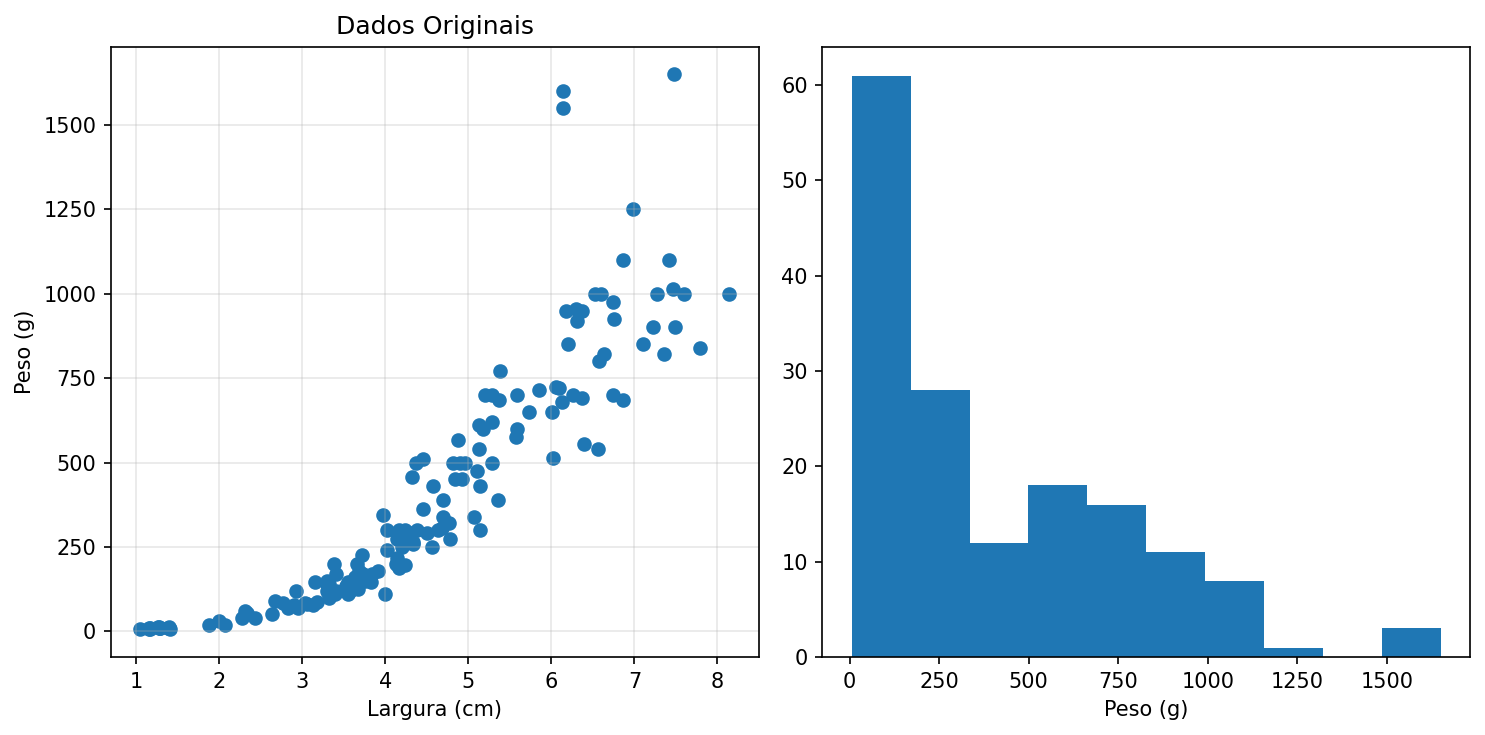

In [8]:
import pandas as pd

#Lê os dados do arquivo csv e removes valores NaN e valores nulos
df = pd.read_csv('Fish.csv')
df.dropna(inplace=True)
df = df[(df[['Weight','Width']] != 0).all(axis=1)] #IMPORTANTÍSSIMO remover valores nulos, porque log(0) = infinito

#variável resposta (y)
peso_peixe = np.array(df['Weight'])

#variável entrada (x)
largura_peixe = np.array(df['Width'])

#Calcula o coeficiente de assimetria
print('Coeficiente de Assimetria: %.2f' % CA(peso_peixe))

#Mostra o gráfico de dispersão e o histograma
plt.figure(dpi=150, figsize=(10,5))
plt.subplot(121)
plt.title('Dados Originais')
plt.scatter(largura_peixe, peso_peixe)
plt.ylabel('Peso (g)')
plt.xlabel('Largura (cm)')
plt.grid(alpha=0.3)
plt.subplot(122)
plt.hist(peso_peixe, bins=10)
plt.xlabel('Peso (g)')
plt.tight_layout()
plt.show()

Resultado - Dados originais
Beta 0: -387.4897
Beta 1: 177.9841
MAE: 114.98
R²: 0.82

Resultado - Dados transformados
Beta 0: 1.5734
Beta 1: 2.7516
MAE: 84.69
R²: 0.89


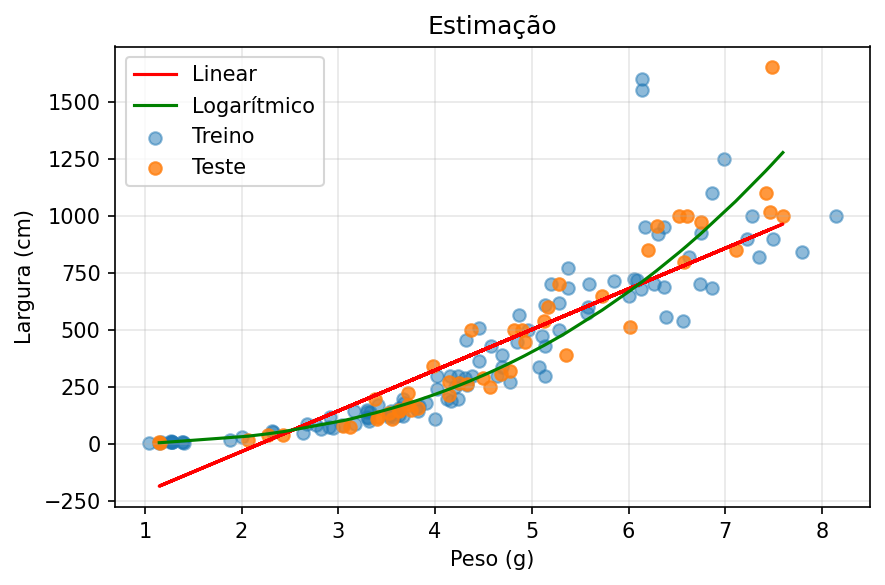

In [9]:
#Import módulo para separa os dados
from sklearn.model_selection import train_test_split

#Separa os dados em treinamento e teste
largura_peixe_train, largura_peixe_test, peso_peixe_train, peso_peixe_test = train_test_split(largura_peixe, peso_peixe, test_size=0.3, random_state=1)

#Ajusta a reta de regressão linear aos dados de treino
reg = LinearRegression().fit(largura_peixe_train.reshape(-1, 1), peso_peixe_train)
beta0, beta1 = reg.intercept_, reg.coef_[0] #coeficientes

#Faz a predição no conjunto de teste
peso_peixe_estimado = reg.predict(largura_peixe_test.reshape(-1, 1))

#Calcula as métricas no conjunto de teste
print('Resultado - Dados originais')
print('Beta 0: %.4f' %beta0)
print('Beta 1: %.4f' %beta1)
print('MAE: %.2f' %mean_absolute_error(peso_peixe_test , peso_peixe_estimado))
print('R²: %.2f' %r2_score(peso_peixe_test , peso_peixe_estimado))

#Aplica a transformação Logaritmica
largura_peixe_train_log = np.log(largura_peixe_train) 
peso_peixe_train_log    = np.log(peso_peixe_train)
largura_peixe_test_log  = np.log(largura_peixe_test) 
peso_peixe_test_log     = np.log(peso_peixe_test)

#Ajusta o modelo de regressão aos dados de treino na escala logarítmica
reg_log = LinearRegression().fit(largura_peixe_train_log.reshape(-1, 1), peso_peixe_train_log)
betal0, betal1 = reg_log.intercept_, reg_log.coef_[0] #coeficientes

#Faz a predição
peso_peixe_estimado_log = np.exp(betal0) * largura_peixe_test**betal1

#Calcula as métricas no conjunto de teste
print('')
print('Resultado - Dados transformados')
print('Beta 0: %.4f' %betal0)
print('Beta 1: %.4f' %betal1)
print('MAE: %.2f' %mean_absolute_error(peso_peixe_test, peso_peixe_estimado_log))
print('R²: %.2f' %r2_score(peso_peixe_test, peso_peixe_estimado_log))

#Ordena os dados para melhor representação gráfica
df_ord = pd.DataFrame({'Largura' : largura_peixe_test, 'Peso' : peso_peixe_estimado_log})
df_ord = df_ord.sort_values(by=['Largura'])

#Mostra o resultado
plt.figure(dpi=150)
plt.title('Estimação')
plt.scatter(largura_peixe_train, peso_peixe_train, alpha=0.5, label='Treino')
plt.scatter(largura_peixe_test, peso_peixe_test, alpha=0.8, label='Teste')
plt.plot(largura_peixe_test, peso_peixe_estimado, color='r', label='Linear')
plt.plot(df_ord['Largura'], df_ord['Peso'], color='g', label='Logarítmico')
plt.xlabel('Peso (g)')
plt.ylabel('Largura (cm)')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

**Mais um exemplo de regressão**

Neste caso vamos utilizar duas variáveis (body mass index e average glucose level in blood) da base de dados Stroke Prediction Dataset disponível no Kaggle.

Coeficiente de Assimetria: 1.61


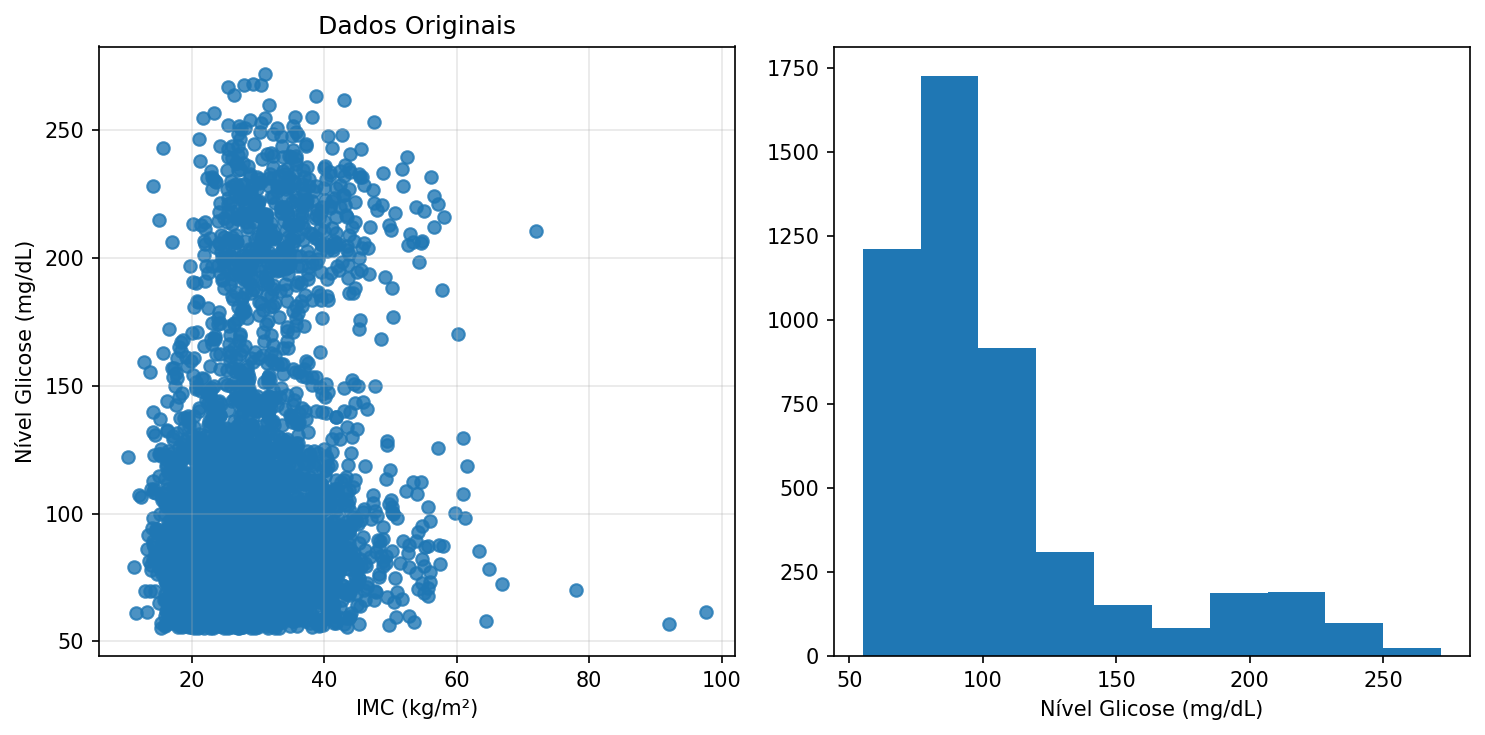

In [10]:
#Lê os dados do arquivo csv e removes valores NaN
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.dropna(inplace=True)

#variável resposta (y)
nivel_glicose = np.array(df['avg_glucose_level'])

#variável entrada (x)
imc = np.array(df['bmi'])

#Calcula o coeficiente de assimetria
print('Coeficiente de Assimetria: %.2f' % CA(nivel_glicose))

#Mostra o gráfico de dispersão e o histograma
plt.figure(dpi=150, figsize=(10,5))
plt.subplot(121)
plt.title('Dados Originais')
plt.scatter(imc, nivel_glicose, alpha=0.8)
plt.ylabel('Nível Glicose (mg/dL)')
plt.xlabel('IMC (kg/m²)')
plt.grid(alpha=0.3)
plt.subplot(122)
plt.hist(nivel_glicose, bins=10)
plt.xlabel('Nível Glicose (mg/dL)')
plt.tight_layout()
plt.show()

In [11]:
#Separa os dados em treinamento e teste
imc_train, imc_test, nivel_glicose_train, nivel_glicose_test = train_test_split(imc, nivel_glicose, test_size=0.3, random_state=0)

#Ajusta a reta de regressão aos dados de treino
reg = LinearRegression().fit(imc_train.reshape(-1, 1), nivel_glicose_train)
beta0, beta1 = reg.intercept_, reg.coef_[0] #coeficientes

#Faz a predição
nivel_glicose_estimado = reg.predict(imc_test.reshape(-1, 1))

#Calcula as métricas no conjunto de teste
print('Resultado - Dados originais')
print('Beta 0: %.4f' %beta0)
print('Beta 1: %.4f' %beta1)
print('MAE: %.2f' %mean_absolute_error(nivel_glicose_test , nivel_glicose_estimado))
print('R²: %.2f' %r2_score(nivel_glicose_test , nivel_glicose_estimado))

#Aplica a transformação Logaritmica
imc_train_log           = np.log(imc_train) 
nivel_glicose_train_log = np.log(nivel_glicose_train)
imc_test_log            = np.log(imc_test) 
nivel_glicose_test_log  = np.log(nivel_glicose_test)

#Ajusta o modelo de regressão aos dados de treino na escala logarítmica
reg_log = LinearRegression().fit(imc_train_log.reshape(-1, 1), nivel_glicose_train_log)
betal0, betal1 = reg_log.intercept_, reg_log.coef_[0] #coeficientes

#Faz a predição
nivel_glicose_estimado_log = np.exp(betal0) * imc_test**betal1

#Calcula as métricas no conjunto de teste
print('')
print('Resultado - Dados transformados')
print('Beta 0: %.4f' %betal0)
print('Beta 1: %.4f' %betal1)
print('MAE: %.2f' %mean_absolute_error(nivel_glicose_test, nivel_glicose_estimado_log))
print('R²: %.2f' %r2_score(nivel_glicose_test, nivel_glicose_estimado_log))

Resultado - Dados originais
Beta 0: 77.4904
Beta 1: 0.9561
MAE: 32.20
R²: 0.03

Resultado - Dados transformados
Beta 0: 3.8952
Beta 1: 0.2072
MAE: 30.51
R²: 0.00


**Referências**


*   Sanford Weisberg. Applied Linear Regression, Third Edition. A John Wiley & Sons, Inc., Publication. 2005.
* http://www.portalaction.com.br/estatistica-basica/25-coeficiente-de-assimetria
* https://www.kaggle.com/aungpyaeap/fish-market
*  https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
